In [1]:
%config Completer.use_jedi = False

# Etapa 1: Instalação das bibliotecas

In [5]:
!apt-get update

Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3012 B]
Err:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease    
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY 544B7F63BF9E4D5F
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease                        
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:5 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1418 kB]
Ign:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]    
Get:8 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2221 kB]
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:10 http://archive.ubunt

In [8]:
!echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && curl "https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg" | apt-key add -

deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  14641      0 --:--:-- --:--:-- --:--:-- 14641
OK


In [11]:
!apt-get update && apt-get install tensorflow-model-server

Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3012 B]
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease              
Get:3 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 Packages [340 B]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease                        
Get:5 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server-universal amd64 Packages [347 B]
Hit:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease             
Ign:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x8

# Etapa 2: Importação das bibliotecas

In [12]:
import os
import json
import random
import requests
import subprocess
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


# Etapa 3: Pré-processamento

## Carregando a base de dados

In [13]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 19s 0us/step


In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Normalização das imagens

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Etapa 4: Definição do modelo

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

## Compilando o modelo

In [17]:
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

## Treinando o modelo

In [18]:
model.fit(X_train, 
          y_train, 
          batch_size=128, 
          epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 141us/sample - loss: 1.5090 - sparse_categorical_accuracy: 0.4566
Epoch 2/10
50000/50000 [==============================] - 4s 80us/sample - loss: 1.0625 - sparse_categorical_accuracy: 0.6275
Epoch 3/10
50000/50000 [==============================] - 4s 80us/sample - loss: 0.8570 - sparse_categorical_accuracy: 0.7023
Epoch 4/10
50000/50000 [==============================] - 4s 80us/sample - loss: 0.7349 - sparse_categorical_accuracy: 0.7437
Epoch 5/10
50000/50000 [==============================] - 4s 81us/sample - loss: 0.6380 - sparse_categorical_accuracy: 0.7787
Epoch 6/10
50000/50000 [==============================] - 4s 80us/sample - loss: 0.5604 - sparse_categorical_accuracy: 0.8034
Epoch 7/10
50000/50000 [==============================] - 4s 81us/sample - loss: 0.4848 - sparse_categorical_accuracy: 0.8299
Epoch 8/10
50000/50000 [==============================] - 4s 80us/sample - loss: 0.4129 - spar

## Avaliação do modelo

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [20]:
print("Test accuracy is {}".format(test_accuracy))

Test accuracy is 0.7415000200271606


# Etapa 5: Salvando o modelo para produção

## Criando o diretório para o modelo

In [21]:
model_dir = "model/"
version = 1

In [22]:
export_path = os.path.join(model_dir, str(version))
export_path

'model/1'

In [23]:
if os.path.isdir(export_path):
    !rm -r {export_path}

## Salvando o modelo para o TensorFlow Serving

In [24]:
o = {t.name: t for t in model.outputs}
o

{'dense_1/Softmax:0': <tf.Tensor 'dense_1/Softmax:0' shape=(?, 10) dtype=float32>}

In [25]:
tf.saved_model.simple_save(tf.keras.backend.get_session(), export_dir = export_path,
                           inputs = {"input_image": model.input},
                           outputs = {t.name: t for t in model.outputs})

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: model/1/saved_model.pb


# Etapa 6: Configuração do ambiente de produção

## Exportando o MODEL_DIR para as variáveis de ambiente

In [26]:
os.environ["model_dir"] = os.path.abspath(model_dir)

## Executando a API TensorFlow Serving REST

In [27]:
%%bash --bg
nohup tensorflow_model_server --rest_api_port=8501 --model_name=cifar10 --model_base_path="${model_dir}" >server.log 2>&1

In [28]:
!tail server.log

2021-07-09 20:38:58.230127: I external/org_tensorflow/tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3792990000 Hz
2021-07-09 20:38:58.258091: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:277] SavedModel load for tags { serve }; Status: success: OK. Took 70864 microseconds.
2021-07-09 20:38:58.258832: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /tf/Notebooks/model/1/assets.extra/tf_serving_warmup_requests
2021-07-09 20:38:58.259278: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: cifar10 version: 1}
2021-07-09 20:38:58.260415: I tensorflow_serving/model_servers/server_core.cc:486] Finished adding/updating models
2021-07-09 20:38:58.260465: I tensorflow_serving/model_servers/server.cc:367] Profiler service is enabled
2021-07-09 20:38:58.261397: I tensorflow_serving/model_servers/server.cc:393] Running gRPC ModelServer at 0.0.0.0:8500 ...
[warn] 

# Etapa 7: Criando a primeira requisição POST

In [29]:
random_image = np.random.randint(0, len(X_test))

In [30]:
random_image

8686

## Criando o objeto JSON

In [31]:
data = json.dumps({"signature_name": "serving_default", "instances": [X_test[random_image].tolist()]})

In [32]:
data

'{"signature_name": "serving_default", "instances": [[[[0.8980392156862745, 0.9568627450980393, 0.9686274509803922], [0.9019607843137255, 0.9490196078431372, 0.9647058823529412], [0.9176470588235294, 0.9529411764705882, 0.9725490196078431], [0.9215686274509803, 0.9529411764705882, 0.9764705882352941], [0.8666666666666667, 0.9215686274509803, 0.9450980392156862], [0.8196078431372549, 0.8862745098039215, 0.9137254901960784], [0.8627450980392157, 0.9294117647058824, 0.9529411764705882], [0.8745098039215686, 0.9411764705882353, 0.9647058823529412], [0.8705882352941177, 0.9333333333333333, 0.9607843137254902], [0.8862745098039215, 0.9450980392156862, 0.9725490196078431], [0.8901960784313725, 0.9450980392156862, 0.9725490196078431], [0.8901960784313725, 0.9450980392156862, 0.9725490196078431], [0.8901960784313725, 0.9450980392156862, 0.9725490196078431], [0.9058823529411765, 0.9568627450980393, 0.9803921568627451], [0.9333333333333333, 0.9686274509803922, 0.9764705882352941], [0.945098039215

## Enviando a primeira requisição POST para o modelo

In [33]:
headers = {"content-type": "application/json"}

In [34]:
json_response = requests.post(url="http://localhost:8501/v1/models/cifar10:predict", data = data, headers = headers)

In [35]:
json_response

<Response [200]>

In [36]:
predictions = json.loads(json_response.text)['predictions']

In [37]:
predictions

[[2.87701391e-06,
  0.00665757386,
  1.19333554e-05,
  2.52282177e-07,
  1.05773688e-05,
  0.000113959752,
  2.27214491e-06,
  1.90444389e-05,
  0.00241504284,
  0.990766406]]

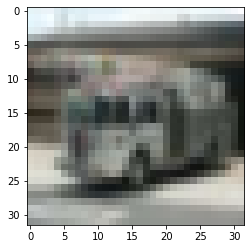

In [38]:
plt.imshow(X_test[random_image])

In [39]:
class_names[np.argmax(predictions[0])]

'truck'

# Etapa 8: Enviando a requisição POST para um modelo específico que está armazendo no servidor

In [40]:
specific_json_response = requests.post(url="http://localhost:8501/v1/models/cifar10/versions/1:predict", data = data, headers = headers)

In [41]:
specific_json_response

<Response [200]>